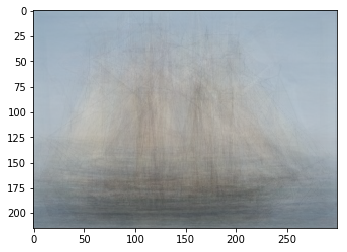

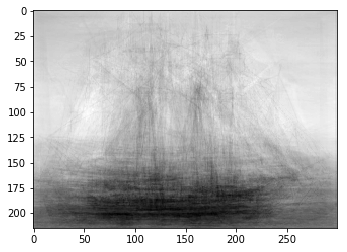

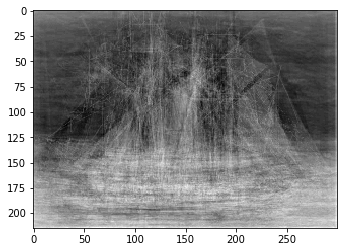

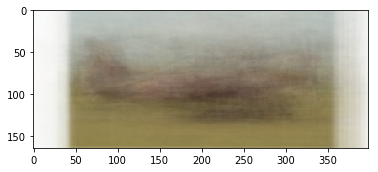

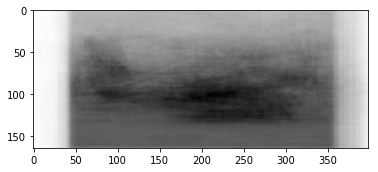

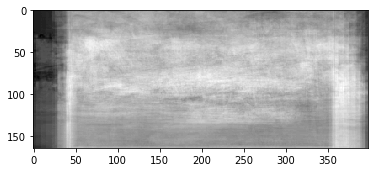

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import os

# image list needs to be a numpy array of pixel data
# of the shape (image_count, image_height, image_width, 3)
# where 3 represents the 3 color chanels of each pixel (RGB) 
def color_mean (image_list) :
    image_count = len(image_list)
    image_shape = image_list[0].shape
    mean_color_im = np.zeros(image_shape)
    for im in image_list :
        mean_color_im = np.add(mean_color_im, im / image_count)
        
    return mean_color_im.astype(np.uint8)


# image list needs to be a numpy array of pixel data
# of the shape (image_count, image_height, image_width)
def intensity_mean (image_list) :
    image_count = len(image_list)
    image_shape = image_list[0].shape
    mean_intens_im = np.mean(image_list, 0)
    
    return mean_intens_im.astype(np.uint8)


# image list needs to be a numpy array of pixel data
# of the shape (image_count, image_height, image_width)
def intens_px_std (image_list) :
    px_std = np.std(image_list, 0)
    
    return px_std.astype(np.uint8)
    
        

def compute_image_means (dir_path) :
    try :
        # save cwd
        original_cwd = os.getcwd()
        # change cwd to image collection directory
        os.chdir(dir_path)
        # get all non-hidden image names
        image_names = [fn for fn in os.listdir() if fn[0] != '.']
        
        images = [Image.open(fn) for fn in image_names]

        # DO COLOR IMAGE MEAN
        images_data = [np.asarray(im) for im in images]
        images_data = np.array(images_data)
        average_color_im = color_mean(images_data)
        
        plt.imshow(average_color_im)
        plt.show()
        
        # DO INTENSITY MEAN
        gray_images = [im.convert('L') for im in images]
                
        gray_images_data = [np.asarray(im) for im in gray_images]
        average_intens_im = intensity_mean(gray_images_data)
        
        plt.imshow(average_intens_im, 'gray')
        plt.show()
        
        # INTESITY MEAN STD
        pixel_std = intens_px_std(gray_images_data)
                
        plt.imshow(pixel_std, 'gray')
        plt.show()

    finally :
        # return to the original cwd
        for im in images : 
            im.close()
        os.chdir(original_cwd)
    

im_collection_path = './colectiiImagini/'
# keep only non-hidden folders
im_collections = [fn for fn in os.listdir(im_collection_path) if fn[0] != '.']
compute_image_means(im_collection_path + im_collections[0])
compute_image_means(im_collection_path + im_collections[1])